In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [70]:
data = pd.read_csv('gold_dataset.csv')
print(data)

                      id           created_at  \
0    1369812663623180288   2021-03-11 6:19:23   
1    1354514776534220804   2021-01-28 1:11:03   
2    1349045265945264130  2021-01-12 22:57:10   
3    1366793773728980992  2021-03-02 22:23:24   
4    1371004616897269763  2021-03-14 13:15:47   
..                   ...                  ...   
495  1358616738389106690   2021-02-08 8:50:46   
496  1354707290222432257  2021-01-28 13:56:01   
497  1357290740712427521  2021-02-04 17:01:44   
498  1370435414306213893  2021-03-12 23:33:58   
499  1360305111352946694   2021-02-13 0:39:46   

                                                 tweet  sum true_value  \
0    In great news my senior parents are getting th...  2.0   POSITIVE   
1    Our Co-Founder and CEO <USER> recently receive...  2.0   POSITIVE   
2    "This is all we have left. This can't fail." <...  0.2   POSITIVE   
3    Dear #MAGA Trump NEVER cared about you. He Jim... -1.2   NEGATIVE   
4    I am all for risk triaging and in tu

In [4]:
id = data.loc[:,'id'].to_numpy()
text = data.loc[:,'tweet'].to_numpy()
polarity = data.loc[:,'true_value'].to_numpy()
dt = data.loc[:,'created_at'].to_list()
gg = []
for x in dt:
    gg.append(x[:10])
dt = np.array(gg)

In [5]:
pos = dict()
neg = dict()
cnt = 0

for x in dt:
    if x not in pos:
        pos[x] = 0
    if x not in neg:
        neg[x] = 0
    # print(polarity[x].shape)
    if polarity[cnt] == 'POSITIVE':
        pos[x] += 1
    if polarity[cnt] == 'NEGATIVE':
        neg[x] += 1
    cnt += 1

last_pos = 0
last_neg = 0

h = []
hp = []
hn = []
    
for i in sorted (pos.keys()):
    last_pos += pos[i]
    last_neg += neg[i]
    pos[i] = last_pos
    neg[i] = last_neg
    h.append(i)
    hp.append(last_pos)
    hn.append(last_neg)
        
print(len(h))        

# for key, value in pos.items():
#     cnt = pos[key] + neg[key]
#     pos[key] = pos[key] / cnt
#     neg[key] = neg[key] / cnt
#     print(key, pos[key], neg[key])

88


Text(0.5, 1.0, 'Number of Positive/Negative Tweets for given date')

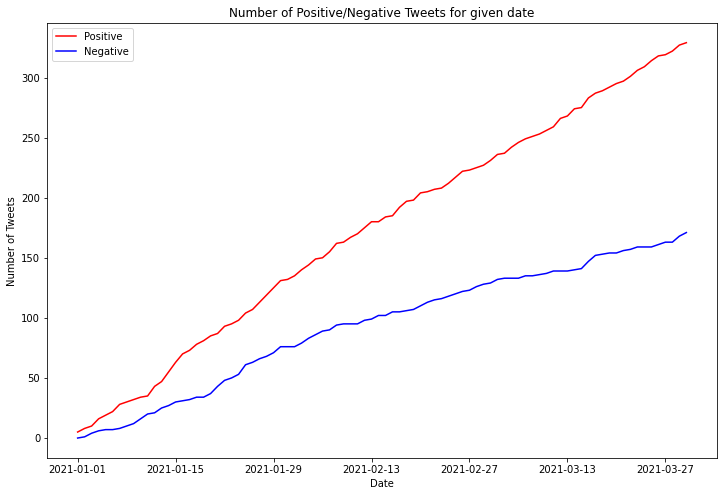

In [6]:
plt.plot(h, hp, color = 'r', label = 'Positive')
plt.plot(h, hn, color = 'b', label = 'Negative')
plt.xticks(h[::14])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title("Number of Positive/Negative Tweets for given date")

In [7]:
id = data.loc[:,'id'].to_numpy()
text = data.loc[:,'tweet'].to_numpy()
polarity = data.loc[:,'polarity_api_output'].to_numpy()
dt = data.loc[:,'created_at'].to_list()
gg = []
for x in dt:
    gg.append(x[:10])
dt = np.array(gg)

In [8]:
pos = dict()
neg = dict()
cnt = 0

for x in dt:
    if x not in pos:
        pos[x] = 0
    if x not in neg:
        neg[x] = 0
    # print(polarity[x].shape)
    if polarity[cnt] == 'POSITIVE':
        pos[x] += 1
    if polarity[cnt] == 'NEGATIVE':
        neg[x] += 1
    cnt += 1

last_pos = 0
last_neg = 0

h = []
hp = []
hn = []
    
for i in sorted (pos.keys()):
    last_pos += pos[i]
    last_neg += neg[i]
    pos[i] = last_pos
    neg[i] = last_neg
    h.append(i)
    hp.append(last_pos)
    hn.append(last_neg)
        
print(len(h))        

# for key, value in pos.items():
#     cnt = pos[key] + neg[key]
#     pos[key] = pos[key] / cnt
#     neg[key] = neg[key] / cnt
#     print(key, pos[key], neg[key])

88


Text(0.5, 1.0, 'Number of Positive/Negative Tweets for given date')

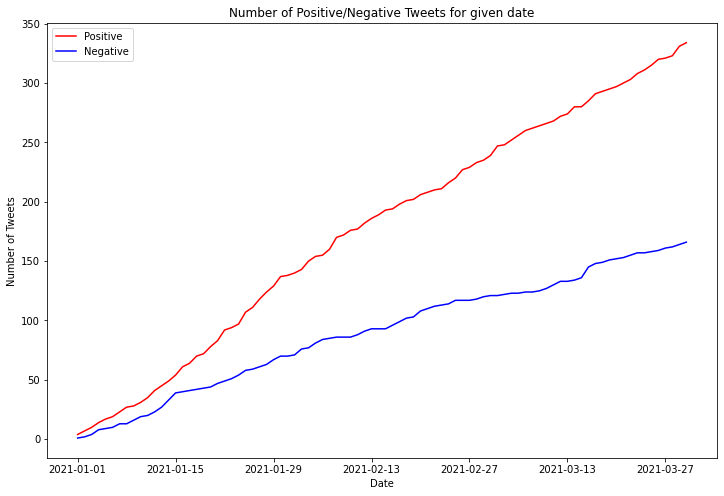

In [9]:
plt.plot(h, hp, color = 'r', label = 'Positive')
plt.plot(h, hn, color = 'b', label = 'Negative')
plt.xticks(h[::14])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title("Number of Positive/Negative Tweets for given date")

In [10]:
polarity = data.loc[:,'true_value'].to_numpy()
dt = data.loc[:,'created_at'].to_list()
gg = []
for x in dt:
    gg.append(x[:10])
dt = np.array(gg)

In [79]:
pos = dict()
neg = dict()
pos_sum = dict()
neg_sum = dict()
cnt = 0
sm = data.loc[:, 'likes_count'].to_numpy()
for i,x in enumerate(dt):
    if x not in pos:
        pos[x] = 0
        pos_sum[x] = 0
    if x not in neg:
        neg[x] = 0
        neg_sum[x] = 0
    # print(polarity[x].shape)
    if polarity[cnt] == 'POSITIVE':
        pos[x] += 1
        pos_sum[x] += sm[i]
    if polarity[cnt] == 'NEGATIVE':
        neg[x] += 1
        neg_sum[x] += sm[i]
    cnt += 1

last_pos = 0
last_neg = 0

h = []
hp = []
hn = []
sp = []
sn = []

for i in sorted (pos.keys()):
    sp.append(pos_sum[i]/(pos[i]+1e-8))
    sn.append(abs(neg_sum[i])/(neg[i]+1e-8))
    last_pos += pos[i]
    last_neg += neg[i]
    pos[i] = last_pos
    neg[i] = last_neg
    h.append(i)
    hp.append(last_pos)
    hn.append(last_neg)
    
    
        
print(len(h))        

# for key, value in pos.items():
#     cnt = pos[key] + neg[key]
#     pos[key] = pos[key] / cnt
#     neg[key] = neg[key] / cnt
#     print(key, pos[key], neg[key])

88


In [80]:
sp = np.array(sp)
sn = np.array(sn)

Text(0.5, 1.0, 'Number of Positive/Negative Tweets for given date')

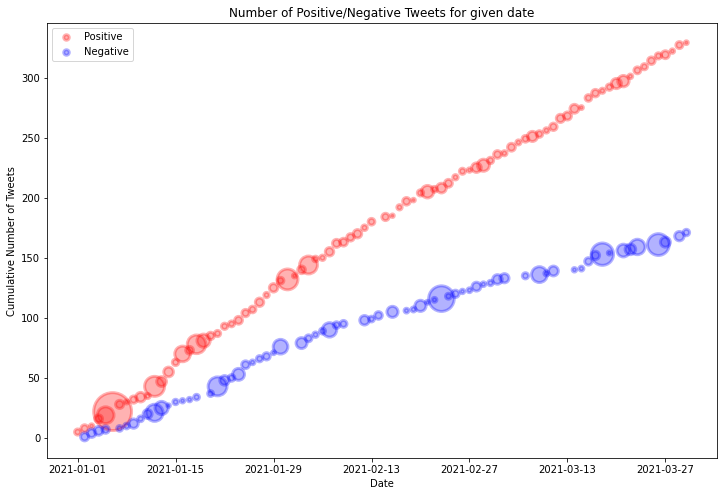

In [81]:
plt.scatter(h, hp, color = 'r', label = 'Positive', s = sp*1, alpha = 0.3, edgecolor = 'r', linewidth = 3)
plt.scatter(h, hn, color = 'b', label = 'Negative', s = sn*1, alpha = 0.3,edgecolor='b', linewidth = 3)
plt.xticks(h[::14])
lgnd = plt.legend(loc="upper left", numpoints=1, fontsize=10)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Tweets')
plt.title("Number of Positive/Negative Tweets for given date")